<a href="https://colab.research.google.com/github/YaninaK/anomaly-detection/blob/b1/notebooks/01_EDA_%26_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обнаружение аномалий в начислениях за тепловую энергию


## 1. Анализ и подготовка данных



In [1]:
initiate = True
if initiate:
  !git init -q
  !git clone -b b1  https://github.com/YaninaK/anomaly-detection.git -q

  from google.colab import drive
  drive.mount('/content/drive')

  !unzip -u -q /content/drive/MyDrive/ML_projects/08_anomaly_detection/data/01_raw/task#3.zip -d /content/anomaly-detection/data/01_raw

%cd /content/anomaly-detection/notebooks

Mounted at /content/drive
/content/anomaly-detection/notebooks


In [2]:
import os
import sys

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", "src", "anomaly_detection"))

In [3]:
import datetime

import numpy as np
import pandas as pd

from data.make_dataset import load_data
from data.preprocess import Preprocess
from data.data_sequence import generate_data_sequence

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
PATH = "/content/anomaly-detection/"

## 1. Чтение данных

In [6]:
folder_path = '../data/01_raw/'
file_names = os.listdir(folder_path)

file_names

['Февраль 2023 Уфа.xlsx',
 '.gitkeep',
 'Март 2023 Уфа.xlsx',
 'Декабрь 2021 Уфа.xls',
 'Декабрь 2022 Уфа.xlsx',
 'Июнь 2022 Уфа.xls',
 'Январь 2022 Уфа.xls',
 'Июнь 2023 Уфа.xlsx',
 'Январь 2023 Уфа.xlsx',
 'Примеры аномалий.docx',
 'Сентябрь 2022 Уфа.xlsx',
 'Апрель 2022 Уфа.xls',
 'Ноябрь 2022 Уфа.xlsx',
 'Апрель 2023 Уфа.xlsx',
 'Май 2023 Уфа.xlsx',
 'Температуры, продолжительность ОП.xls',
 'Октябрь 2021 Уфа.xls',
 'Июль 2021 Уфа.xls',
 'Октябрь 2022 Уфа.xlsx',
 'Август 2022 Уфа.xlsx',
 'Март 2022 Уфа.xls',
 'Февраль 2022 Уфа.xls',
 'Тип строения, этажность, площадь, год постройки.xlsx',
 'Август 2021 Уфа.xls',
 'Май 2022 Уфа.xls',
 'Ноябрь 2021 Уфа.xls',
 'Июль 2022 Уфа.xlsx',
 'Сентябрь 2021 Уфа.xls']

In [7]:
regenerate = True
data, temperature, buildings = load_data(folder_path, regenerate, path=PATH)

100%|██████████| 24/24 [00:10<00:00,  2.34it/s]


### 1.1. Данные учета теплоэнергии

In [8]:
print(f"data.shape = {data.shape}\n")
data.sample(2)

data.shape = (75391, 9)



,index,Подразделение,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",Период потребления
52777,2532,Уфа,219972,ГВС-ИТП,"г Уфа, ул. Менделеева, д.170",Другое строение,2022-11-01,49.29,2022-10-01
66712,1288,Уфа,00218465,ГВС-ИТП,"г Уфа, ул. Мустая Карима, д.69 корп.1",Другое строение,NaT,NaN,2022-05-01


* Дублирование данных:

In [9]:
data[data.iloc[:, 1:].duplicated(keep=False)]

,index,Подразделение,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",Период потребления
2164,2167,Уфа,00273416,ГВС-ИТП,"г Уфа, ул. Комсомольская, д.33",Другое строение,2023-03-01,142.989,2023-02-01
2165,2168,Уфа,00273416,ГВС-ИТП,"г Уфа, ул. Комсомольская, д.33",Другое строение,2023-03-01,142.989,2023-02-01
31615,1190,Уфа,114390,ГВС-ИТП,"г Уфа, ул. Мира, д.33",Многоквартирный дом,2022-05-01,101.094,2022-04-01
31616,1191,Уфа,114390,ГВС-ИТП,"г Уфа, ул. Мира, д.33",Многоквартирный дом,2022-05-01,101.094,2022-04-01
57517,1848,Уфа,00273416,ГВС-ИТП,"г Уфа, ул. Комсомольская, д.33",Другое строение,NaT,NaN,2022-03-01
57518,1849,Уфа,00273416,ГВС-ИТП,"г Уфа, ул. Комсомольская, д.33",Другое строение,NaT,NaN,2022-03-01
69658,2933,Уфа,2300 N CF944,NaN,"г Уфа, ул. Трамвайная, д.3",Другое строение,2021-12-01,8213.300,2021-11-01
69716,2991,Уфа,2300 N CF944,NaN,"г Уфа, ул. Трамвайная, д.3",Другое строение,2021-12-01,8213.300,2021-11-01
71683,636,Уфа,20-128030,ГВС-ИТП,"г Уфа, ул. Ладыгина, д.11",Многоквартирный дом,2022-08-01,17.848,2022-07-01
71684,637,Уфа,20-128030,ГВС-ИТП,"г Уфа, ул. Ладыгина, д.11",Многоквартирный дом,2022-08-01,17.848,2022-07-01


### 1.2 Данные об объектах: тип строения, этажность, площадь, год постройки

In [10]:
print(f"buildings.shape = {buildings.shape}\n")
buildings.sample(2)

buildings.shape = (5873, 5)



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
5305,"г Уфа, ул. Ферина, д.18",Многоквартирный дом,9,1974-01-01 00:00:00,11195.88
4496,"г Уфа, ул. Рихарда Зорге, д.65*потери корп.Б",Другое строение,0,NaN,NaN


In [11]:
buildings["Адрес объекта"].nunique()

5695

### 1.3. Данные о температуре и продолжительности отопительного периода

  * ОЗП — осенне-зимний период, время, когда работает система отопления.

In [12]:
temperature = pd.read_excel(
    f'{folder_path}Температуры, продолжительность ОП.xls', index_col=1, skiprows=1
).T[1:].reset_index()

temperature

Период,index,"Тн.в, град.С","Продолжительность ОЗП, сут."
0,2021-07-01,NaN,NaN
1,2021-08-01,NaN,NaN
2,2021-09-01,NaN,NaN
3,2021-10-01,6.696552,29.0
4,2021-11-01,-1.000000,31.0
5,2021-12-01,-5.176667,30.0
6,2022-01-01,-11.500000,31.0
7,2022-02-01,-6.735714,28.0
8,2022-03-01,-5.151613,31.0
9,2022-04-01,5.650000,34.0


## 2. Подготовка данных

In [13]:
preprocess = Preprocess()
data, buildings, temperature = preprocess.fit_transform(data, buildings, temperature)

In [14]:
data.shape

(75385, 10)

In [15]:
df_seq = generate_data_sequence(data)

print(f"df_seq.shape = {df_seq.shape}\n")
df_seq.sample(2)

df_seq.shape = (4628, 24)



,,,,,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,...,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта 2,,,,,,,,,,,,,,,,,,,,,
"г Уфа, ул. Бессонова, д.5",Многоквартирный дом,110772,1,"г Уфа, ул. Бессонова, д.5",20.0940,19.6670,12.3710,57.764,83.445,113.221,128.064,116.679,121.7540,100.928,...,19.1210,63.443,93.787,143.231,144.888,127.0430,108.180,100.430,20.703,17.107
"г Уфа, ул. Степана Халтурина, д.44",Многоквартирный дом,"178008, 109004",1,"г Уфа, ул. Степана Халтурина, д.44",22.5652,29.7497,34.1824,80.540,162.032,193.731,230.857,195.878,203.8365,176.921,...,27.2172,119.564,162.305,222.928,229.309,200.5751,168.933,161.305,27.210,31.975


* Сгенерирована последовательность из 24 месяцев по каждому объекту

In [16]:
temperature

Период,"Тн.в, град.С",ОЗП,Число дней
index,,,
2021-07-01,25.000000,0,31.0
2021-08-01,25.000000,0,31.0
2021-09-01,25.000000,0,32.0
2021-10-01,6.696552,1,29.0
2021-11-01,-1.000000,1,31.0
2021-12-01,-5.176667,1,30.0
2022-01-01,-11.500000,1,31.0
2022-02-01,-6.735714,1,28.0
2022-03-01,-5.151613,1,31.0


1. Введен бинарный признак осенне-зимний период ("ОЗП")
2. Введен признак "Число дней" - Продолжительность ОЗП в сутках в отопительный период либо число дней в месяце вне отопительного периода с поправкой на дату начала/ конца отопительного периода.
3. Температура вне отопительного периода зафиксирована на уровне 25 градусов С.

## 3. EDA

### 3.1 - Анализ пропусков в учете потребления теплоэнергии

In [17]:
df_seq = df_seq.replace(0, np.nan)
df_seq.shape

(4628, 24)

In [18]:
zero_data = df_seq[df_seq.isnull().sum(axis=1) == df_seq.shape[1]]
zero_df = pd.DataFrame(zero_data.index.tolist(), columns=zero_data.index.names)

print(f"zero_data.shape = {zero_df.shape}")
zero_df.iloc[:, :-1].sample(2)

zero_data.shape = (70, 5)


,Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС
36,"г Уфа, ул. Космонавтов, д.12",Другое строение,16044554,1
43,"г Уфа, ул. Нежинская, д.27, Подобъект №985649",Многоквартирный дом,291312,0


* По 70 объектам учета потребления теплоэнергии нет данных за двухлетний период. Рассмотрим остальные объекты.

In [19]:
df_seq = df_seq[df_seq.isnull().sum(axis=1) < df_seq.shape[1]]

print(f"df_seq.shape = {df_seq.shape}")
df_seq.sample(2)

df_seq.shape = (4558, 24)


,,,,,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,...,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта 2,,,,,,,,,,,,,,,,,,,,,
"г Уфа, пр-кт Октября, д.74 корп.1",Другое строение,1123959,1,"г Уфа, пр-кт Октября, д.74 корп.1",2.22,1.45,11.85,36.261,63.971,82.760,104.240,83.530,81.090,53.320,...,4.4,51.820,69.060,98.920,103.100,81.090,67.370,50.030,2.89,2.74
"г Уфа, ул. Айская, д.64 корп.3",Многоквартирный дом,00101749,0,"г Уфа, ул. Айская, д.64 корп.3",NaN,NaN,NaN,48.924,61.105,83.502,106.124,87.871,88.432,68.085,...,NaN,50.999,73.422,111.038,109.489,93.729,73.339,62.892,NaN,NaN


min = 968, max = 4342


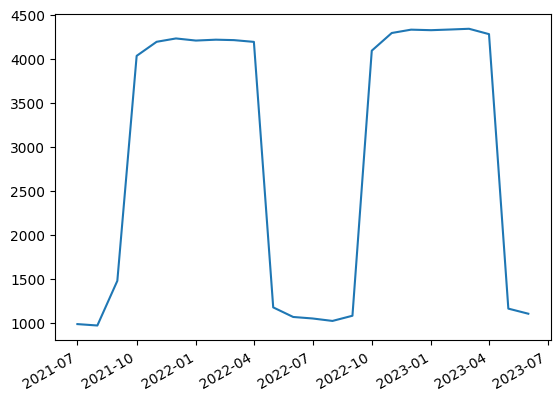

In [20]:
monthly_data = df_seq.notnull().sum(axis=0)
print(f"min = {monthly_data.min()}, max = {monthly_data.max()}")
monthly_data.plot();

* В число объектов с данными о потреблении теплоэнергии в период с мая по сентябрь - около 1000, с октября по апрель - более 4000.

* Новые объекты:

In [21]:
new_objects = buildings[buildings["Дата постройки"] >= df_seq.columns[0]]
a = df_seq.reset_index()
new_items = sorted(
    list(
        set(zip(new_objects["Адрес объекта"], new_objects["Тип Объекта"]))
        & set(zip(a["Адрес объекта"], a["Тип объекта"]))
    )
)
new_items

[('г Уфа, пр-кт Октября, д.156', 'Другое строение'),
 ('г Уфа, ул. Гази Загитова, д.11', 'Многоквартирный дом'),
 ('г Уфа, ул. Рихарда Зорге, д.17 корп.2', 'Многоквартирный дом'),
 ('г Уфа, ул. Свободы, д.29', 'Другое строение'),
 ('г Уфа, ул. Современников, д.4', 'Многоквартирный дом'),
 ('г Уфа, ул. Уфимское шоссе, д.24', 'Многоквартирный дом'),
 ('г Уфа, ул. Энтузиастов, д.15', 'Многоквартирный дом')]

In [22]:
addr, obj_type = new_items[0]
time = buildings.loc[
    (buildings["Адрес объекта"] == addr)
    & (buildings["Тип Объекта"] == obj_type),
    "Дата постройки"
    ].values[0]

print(f"Дата постройки {np.datetime_as_string(time, unit='M')}")

x1 = df_seq.copy().isnull().astype(int)
x1.loc[
    (x1.index.get_level_values("Адрес объекта") == addr)
    & (x1.index.get_level_values("Тип объекта") == obj_type), :
]

Дата постройки 2023-10


,,,,,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,...,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта 2,,,,,,,,,,,,,,,,,,,,,
"г Уфа, пр-кт Октября, д.156",Другое строение,127653,0,"г Уфа, пр-кт Октября, д.156",1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


* Объект, по адресу ```г Уфа, пр-кт Октября, д.156```, тип ```Другое строение``` начал потреблять теплоэнергию за 2 года до того как был построен:

  * Дата постройки: 2023-10-01
  * Первый месяц учета потребления теплоэнергии: 2021-09-01

In [23]:
addr, obj_type = new_items[3]
time = buildings.loc[
    (buildings["Адрес объекта"] == addr)
    & (buildings["Тип Объекта"] == obj_type),
    "Дата постройки"
    ].values[0]

print(f"Дата постройки {np.datetime_as_string(time, unit='M')}")

x1 = df_seq.copy().isnull().astype(int)
x1.loc[
    (x1.index.get_level_values("Адрес объекта") == addr)
    & (x1.index.get_level_values("Тип объекта") == obj_type), :
]

Дата постройки 2022-10


2021-07-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           1   
                                         100758 0               г Уфа, ул. Свободы, д.29           1   
                                         100846 0               г Уфа, ул. Свободы, д.29           1   
                                         101548 0               г Уфа, ул. Свободы, д.29           1   
                                         102575 0               г Уфа, ул. Свободы, д.29           1   

                                                                                          2021-08-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           1   
                                         100758 0               г Уфа, ул. Свободы, д.29           1   
                                         100846 0               г Уфа, ул. Свободы, д.29           1   
                                         101548 0               г Уфа, ул. Свободы, д.29           1   
                                         102575 0               г Уфа, ул. Свободы, д.29           1   

                                                                                          2021-09-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           0   
                                         100758 0               г Уфа, ул. Свободы, д.29           0   
                                         100846 0               г Уфа, ул. Свободы, д.29           1   
                                         101548 0               г Уфа, ул. Свободы, д.29           0   
                                         102575 0               г Уфа, ул. Свободы, д.29           0   

                                                                                          2021-10-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           0   
                                         100758 0               г Уфа, ул. Свободы, д.29           0   
                                         100846 0               г Уфа, ул. Свободы, д.29           1   
                                         101548 0               г Уфа, ул. Свободы, д.29           0   
                                         102575 0               г Уфа, ул. Свободы, д.29           0   

                                                                                          2021-11-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           0   
                                         100758 0               г Уфа, ул. Свободы, д.29           0   
                                         100846 0               г Уфа, ул. Свободы, д.29           0   
                                         101548 0               г Уфа, ул. Свободы, д.29           0   
                                         102575 0               г Уфа, ул. Свободы, д.29           0   

                                                                                          2021-12-01  \
Адрес объекта            Тип объекта     № ОДПУ Вид энерг-а ГВС Адрес объекта 2                        
г Уфа, ул. Свободы, д.29 Другое строение 100027 0               г Уфа, ул. Свободы, д.29           0   
                                         100758 0               г Уфа, ул. Свободы, д.29           0   
                             



* Объект по адресу ```г Уфа, ул. Свободы, д.29```, тип ```Другое строение``` который был построен в октябре 2022 года, а теплоэнергию начал потреблять, минимум, с июля 2021… Потребление теплоэнергии  фиксировалось сразу несколькими ОДПУ весь отопительный сезон, предшествующий постройке здания.




In [24]:
new_items = [ind for i, ind in enumerate(new_items) if i not in [0, 3]]
new_items

[('г Уфа, ул. Гази Загитова, д.11', 'Многоквартирный дом'),
 ('г Уфа, ул. Рихарда Зорге, д.17 корп.2', 'Многоквартирный дом'),
 ('г Уфа, ул. Современников, д.4', 'Многоквартирный дом'),
 ('г Уфа, ул. Уфимское шоссе, д.24', 'Многоквартирный дом'),
 ('г Уфа, ул. Энтузиастов, д.15', 'Многоквартирный дом')]

In [25]:
mask = df_seq.isnull().astype(int)

for (addr, obj_type) in new_items:
  time = buildings.loc[
    (buildings["Адрес объекта"] == addr)
    & (buildings["Тип Объекта"] == obj_type),
    "Дата постройки"
    ].values[0]

  for col in df_seq.columns:
    if time > col:
      mask.loc[
          (mask.index.get_level_values("Адрес объекта") == addr)
          & (mask.index.get_level_values("Тип объекта") == obj_type), col] = 0

mask.sample(2)

,,,,,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,...,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта 2,,,,,,,,,,,,,,,,,,,,,
"г Уфа, ул. Уфимское шоссе, д.36",Другое строение,25041,0,"г Уфа, ул. Уфимское шоссе, д.36",1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
"г Уфа, ул. Ростовская, д.26 корп.А",Другое строение,284630,0,"г Уфа, ул. Ростовская, д.26 корп.А",1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,0,0,0,1,1,1


In [26]:
summer_missing = mask[[i for i in mask.columns if i.month in range(5, 10)]]
summer_missing_all = summer_missing[summer_missing.sum(axis=1) == len(summer_missing.columns)]
summer_missing = summer_missing[summer_missing.sum(axis=1) < len(summer_missing.columns)]

print(f"Число объектов, по которым не ведется учет теплоэнергии в летний период: {summer_missing_all.shape[0]}")
print(f"Число объектов, по которым ведется учет теплоэнергии в летний период: {summer_missing.shape[0]}")
print(f"Всего пропусков в летний период: {summer_missing.sum().sum()}")

Число объектов, по которым не ведется учет теплоэнергии в летний период: 2866
Число объектов, по которым ведется учет теплоэнергии в летний период: 1692
Всего пропусков в летний период: 5830


In [27]:
winter_missing = mask[[i for i in mask.columns if i.month not in range(5, 10)]]
winter_missing_all = winter_missing[winter_missing.sum(axis=1) == len(winter_missing.columns)]
winter_missing = winter_missing[winter_missing.sum(axis=1) < len(winter_missing.columns)]

print(f"Число объектов, по которым не ведется учет теплоэнергии в отопительный сезон: {winter_missing_all.shape[0]}")
print(f"Число объектов, по которым ведется учет теплоэнергии в отопительный сезон: {winter_missing.shape[0]}")
print(f"Всего пропусков в отопительный сезон период: {winter_missing.sum().sum()}")

Число объектов, по которым не ведется учет теплоэнергии в отопительный сезон: 2
Число объектов, по которым ведется учет теплоэнергии в отопительный сезон: 4556
Всего пропусков в отопительный сезон период: 4485


### 3.2 Анализ объектов

In [28]:
df = buildings.merge(
  data
  .pivot_table(
      index="Адрес объекта",
      columns="Период потребления",
      values="Текущее потребление, Гкал",
  )
  .replace(0, np.nan)
  .reset_index(),
  how="right",
  left_on="Адрес объекта",
  right_on="Адрес объекта",
)
df.shape

(4368, 30)

#### 3.2.1 Структура данных в разрезе типов объектов

In [29]:
pd.concat(
    [
        df["Тип Объекта"].value_counts(),
        df["Тип Объекта"].value_counts(normalize=True)
    ], axis=1
)

,count,proportion
Тип Объекта,,
Многоквартирный дом,3050,0.722235
Другое строение,1085,0.256926
Дет.ясли и сады,19,0.004499
"Учебное заведение, комбинат, центр",14,0.003315
"Административные здания, конторы",12,0.002842
"Жилое здание (Гостиница, Общежитие)",11,0.002605
Школы и ВУЗ,10,0.002368
Магазины,5,0.001184
Гаражи,3,0.000710


* На тип ```Многоквартирный дом``` приходится 72% от всех данных.
* Свыше 25% объектов приходится на тип ```Другое строение```

#### 3.2.2 Анализ признака ```Общая площадь объектов```

In [30]:
df["Общая площадь объекта"].describe([0.01, 0.25, 0.5, 0.75, 0.9, 0.99])

,Общая площадь объекта
count,4210.000000
mean,3950.115639
std,4578.319585
min,0.000000
1%,0.010000
25%,0.040000
50%,3393.850000
75%,4928.350000
90%,8431.430000
99%,20813.359000


##### Объекты с Общей площадью <= 0.1

* Структура отсутствующих данных по площади объектов в разрезе типов объектов.

In [31]:
cond = df["Общая площадь объекта"].isnull() | (df["Общая площадь объекта"] < 1)

pd.concat(
    [
        df[cond]["Тип Объекта"].value_counts(),
        df[cond]["Тип Объекта"].value_counts(normalize=True)
    ], axis=1
)

,count,proportion
Тип Объекта,,
Другое строение,1077,0.942257
Дет.ясли и сады,19,0.016623
"Административные здания, конторы",12,0.010499
Школы и ВУЗ,7,0.006124
"Жилое здание (Гостиница, Общежитие)",6,0.005249
Магазины,5,0.004374
"Учебное заведение, комбинат, центр",5,0.004374
Гаражи,3,0.002625
Больницы,2,0.001750


* Среди объектов, у которых отсутствуют данные по общей площади,  более 94% - объекты типа ```Другое строение```.


##### Объекты с Общей площадью > 5000

In [32]:
cond = df["Общая площадь объекта"] >= 5000
pd.concat(
    [
        df[cond]["Тип Объекта"].value_counts(),
        df[cond]["Тип Объекта"].value_counts(normalize=True)
    ], axis=1
)

,count,proportion
Тип Объекта,,
Многоквартирный дом,1030,0.992293
"Жилое здание (Гостиница, Общежитие)",2,0.001927
"Учебное заведение, комбинат, центр",2,0.001927
Нежилой дом,1,0.000963
Казармы и помещения ВОХР,1,0.000963
Другое строение,1,0.000963
Общежитие,1,0.000963


* Объекты с Общей площадью > 5000, в основном, многоквартирные дома.

#### 3.2.3 Объекты без Даты постройки

In [33]:
cond = df["Дата постройки"].isnull()
pd.concat(
    [
        df[cond]["Тип Объекта"].value_counts(),
        df[cond]["Тип Объекта"].value_counts(normalize=True)
    ], axis=1
).head()

,count,proportion
Тип Объекта,,
Другое строение,757,0.945069
Дет.ясли и сады,12,0.014981
Многоквартирный дом,11,0.013733
"Административные здания, конторы",8,0.009988
Школы и ВУЗ,4,0.004994


* Среди объектов без даты постройки 94.5% объектов типа ```Другое строение```.

#### 3.2.4. Неуникальные адреса объектов

In [34]:
df_ = df[
    df.duplicated(subset=["Адрес объекта", "Тип Объекта"], keep=False)
]
print(f"Всего неуникальных объектов: {df_.shape[0]}\n")
df_.iloc[:, :-25].head(6)

Всего неуникальных объектов: 104



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
107,"г Уфа, б-р. Тухвата Янаби, д.34",Другое строение,1.0,NaT,0.01
108,"г Уфа, б-р. Тухвата Янаби, д.34",Другое строение,2.0,NaT,0.01
347,"г Уфа, пр-кт Октября, д.153",Другое строение,0.0,NaT,0.01
348,"г Уфа, пр-кт Октября, д.153",Другое строение,3.0,NaT,0.01
416,"г Уфа, пр-кт Октября, д.31",Другое строение,0.0,1970-01-01,0.01
417,"г Уфа, пр-кт Октября, д.31",Другое строение,5.0,1970-01-01,0.01


* Неуникальные объекты в разрезе типов объектов:

In [35]:
pd.concat(
    [
      df_["Тип Объекта"].value_counts(),
      df_["Тип Объекта"].value_counts(True),
      df_.groupby(["Тип Объекта"])["Адрес объекта"].agg(lambda x: x.nunique())
    ], axis=1
)

,count,proportion,Адрес объекта
Тип Объекта,,,
Другое строение,87,0.836538,39
Многоквартирный дом,14,0.134615,7
"Учебное заведение, комбинат, центр",3,0.028846,1


* 84% неуникальных объектов приходится на тип ```Другое строение```, около 13% - на тип ```Многоквартирный дом```.

* Уникальный адрес объекта нужен для привязки площади объекта и даты постройки к данным учета потребления теплоэнергии. В случае с типом ```Другое строение``` - в подавляющем большинстве случаев эти данные отстутствуют, соответственно этот блок информации не имеет смысла корректировать.

##### Объекты типа ```Многоквартирный дом```

In [36]:
df_[df_["Тип Объекта"] == "Многоквартирный дом"].iloc[:, :-24]

,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта,Адрес объекта 2
1282,"г Уфа, ул. Вологодская, д.13",Многоквартирный дом,9.0,1979-01-01,2022.00,"г Уфа, ул. Вологодская, д.13, Подобъект №984990"
1283,"г Уфа, ул. Вологодская, д.13",Многоквартирный дом,9.0,1979-01-01,8256.50,"г Уфа, ул. Вологодская, д.13"
1296,"г Уфа, ул. Вологодская, д.20",Многоквартирный дом,12.0,1978-01-01,655.00,"г Уфа, ул. Вологодская, д.20, extra"
1297,"г Уфа, ул. Вологодская, д.20",Многоквартирный дом,12.0,1978-01-01,3681.40,"г Уфа, ул. Вологодская, д.20"
1634,"г Уфа, ул. Интернациональная, д.113",Многоквартирный дом,1.0,1964-01-01,1161.90,"г Уфа, ул. Интернациональная, д.113, extra"
1635,"г Уфа, ул. Интернациональная, д.113",Многоквартирный дом,5.0,1964-01-01,2563.70,"г Уфа, ул. Интернациональная, д.113"
1864,"г Уфа, ул. Кирова, д.95",Многоквартирный дом,1.0,1971-01-01,0.01,"г Уфа, ул. Кирова, д.95, Подобъект №46590"
1865,"г Уфа, ул. Кирова, д.95",Многоквартирный дом,5.0,1971-01-01,3448.80,"г Уфа, ул. Кирова, д.95"
2780,"г Уфа, ул. Нежинская, д.6",Многоквартирный дом,9.0,1972-01-01,427.70,"г Уфа, ул. Нежинская, д.6, extra"
2781,"г Уфа, ул. Нежинская, д.6",Многоквартирный дом,9.0,1972-01-01,2544.60,"г Уфа, ул. Нежинская, д.6"


In [37]:
df_[df_["Тип Объекта"] == "Многоквартирный дом"]["Адрес объекта 2"].tolist()

['г Уфа, ул. Вологодская, д.13, Подобъект №984990',
 'г Уфа, ул. Вологодская, д.13',
 'г Уфа, ул. Вологодская, д.20, extra',
 'г Уфа, ул. Вологодская, д.20',
 'г Уфа, ул. Интернациональная, д.113, extra',
 'г Уфа, ул. Интернациональная, д.113',
 'г Уфа, ул. Кирова, д.95, Подобъект №46590',
 'г Уфа, ул. Кирова, д.95',
 'г Уфа, ул. Нежинская, д.6, extra',
 'г Уфа, ул. Нежинская, д.6',
 'г Уфа, ул. Революционная, д.88, Подобъект №46372',
 'г Уфа, ул. Революционная, д.88',
 'г Уфа, ул. Энтузиастов, д.6, Подобъект №984984',
 'г Уфа, ул. Энтузиастов, д.6']

На 7 неуникальных адресах находится 14 объектов типа ```Многоквартирный дом``` - по 2 на каждый адрес:
  * ```г Уфа, ул. Вологодская, д.13```,
  * ```г Уфа, ул. Вологодская, д.20```,
  * ```г Уфа, ул. Интернациональная, д.113```,
  * ```г Уфа, ул. Кирова, д.95```,
  * ```г Уфа, ул. Нежинская, д.6```,
  * ```г Уфа, ул. Революционная, д.88```,
  * ```г Уфа, ул. Энтузиастов, д.6```.

  * Адреса многоквартирных домов сделаны уникальными в признаке ```Адрес объекта 2``` через сопоставление с данными об учете теплоэнергии.
  * На трех объектах ниже счета не выставляются, для них в признаке ```Адрес объекта 2``` к адресу добавлено слово ```extra``` :
    * ```г Уфа, ул. Вологодская, д.20```,
    * ```г Уфа, ул. Интернациональная, д.113```,
    * ```г Уфа, ул. Нежинская, д.6```.

##### Объекты типа ```Учебное заведение, комбинат, центр```

In [38]:
df_[df_["Тип Объекта"] == "Учебное заведение, комбинат, центр"].iloc[:, :-24]

,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта,Адрес объекта 2
3249,"г Уфа, ул. Рихарда Зорге, д.27","Учебное заведение, комбинат, центр",1.0,1985-01-01,0.01,"г Уфа, ул. Рихарда Зорге, д.27"
3250,"г Уфа, ул. Рихарда Зорге, д.27","Учебное заведение, комбинат, центр",5.0,1985-01-01,4008.00,"г Уфа, ул. Рихарда Зорге, д.27, № ОДПУ 00111382"
3251,"г Уфа, ул. Рихарда Зорге, д.27","Учебное заведение, комбинат, центр",12.0,1985-01-01,3226.90,"г Уфа, ул. Рихарда Зорге, д.27, № ОДПУ 00102590"


* 3 объекта типа ```Учебное заведение, комбинат, центр	``` находятся на одном адресе.
* В данных учета потребления теплоэнергии на этот адрес приходится 2 ```№ ОДПУ```.
* Адреса сделаны уникальными в признаке ```Адрес объекта 2``` через сопоставление с данными об учете теплоэнергии и проставление ``№ ОДПУ`` в адрес.

#### 3.2.5. Подобъекты

In [39]:
cond1_a = data["Тип объекта"] == "Многоквартирный дом"
cond1_b = buildings["Тип Объекта"] == "Многоквартирный дом"

addr = sorted(list(set(data[cond1_a]["Адрес объекта"]) - set(buildings[cond1_b]["Адрес объекта"])))
addr

['г Уфа, б-р. Давлеткильдеева, д.18, Подобъект №987152',
 'г Уфа, б-р. Давлеткильдеева, д.5, Подобъект №985759',
 'г Уфа, б-р. Ибрагимова, д.34, Подобъект №983365',
 'г Уфа, б-р. Молодежный, д.2, Подобъект №992132',
 'г Уфа, б-р. Молодежный, д.6 корп.1, Подобъект №983457',
 'г Уфа, б-р. Тухвата Янаби, д.22, Подобъект №351681',
 'г Уфа, пр-кт Октября, д.122, Подобъект №42688',
 'г Уфа, пр-кт Октября, д.174/2, Подобъект №985197',
 'г Уфа, пр-кт Октября, д.25, Подобъект №48042',
 'г Уфа, пр-кт Октября, д.25, Подобъект №48043',
 'г Уфа, пр-кт Октября, д.25, Подобъект №48044',
 'г Уфа, пр-кт Октября, д.60 корп.1, Подобъект №51211',
 'г Уфа, пр-кт Октября, д.78 корп.3, Подобъект №989097',
 'г Уфа, ул. 50 лет СССР, д.2, Подобъект №47840',
 'г Уфа, ул. 8 Марта, д.12 корп.3, Подобъект №49931',
 'г Уфа, ул. Академика Королева, д.2 корп.2, Подобъект №51212',
 'г Уфа, ул. Ахметова, д.324, Подобъект №986621',
 'г Уфа, ул. Баязита Бикбая, д.44, Подобъект №983215',
 'г Уфа, ул. Блюхера, д.17, Подобъе

In [40]:
len(addr)

77

In [41]:
s = 'г Уфа, ул. Энтузиастов, д.14'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Энтузиастов, д.14'
 'г Уфа, ул. Энтузиастов, д.14, Подобъект №984513'
 'г Уфа, ул. Энтузиастов, д.14, Подобъект №984765'
 'г Уфа, ул. Энтузиастов, д.14, Подобъект №984848']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
5715,"г Уфа, ул. Энтузиастов, д.14",Многоквартирный дом,18,2018-01-01,27686.6


In [42]:
data[data["Адрес объекта"]=="г Уфа, ул. Энтузиастов, д.14"]["№ ОДПУ"].unique()

array(['278553,278511'], dtype=object)

In [43]:
data[data["Адрес объекта"]=="г Уфа, ул. Энтузиастов, д.14, Подобъект №984765"]["№ ОДПУ"].unique()

array(['18480739'], dtype=object)

* У подобъектов и объектов отличается ```№ ОДПУ```- учет ведется раздельно, при этом площадь - общая.
* Для использования в моделях необходимо включить подобъекты в объекты.

In [44]:
sorted(list(set(data[cond1_a]["Адрес объекта 2"]) - set(buildings[cond1_b]["Адрес объекта 2"])))

['г Уфа, ул. Пархоменко, д.156 корп.Литер 2в',
 'г Уфа, ул. Уфимское шоссе, д.4']

#### 3.2.6 Объекты, по которым ведется учет теплоэнергии, но отсутствующие в базе данных объектов

In [45]:
df = generate_data_sequence(data)

print(f"df.shape = {df.shape}\n")
df.sample(2)

df.shape = (4628, 24)



,,,,,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,...,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01
Адрес объекта,Тип объекта,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта 2,,,,,,,,,,,,,,,,,,,,,
"г Уфа, пр-кт Октября, д.91",Другое строение,50946,1,"г Уфа, пр-кт Октября, д.91",NaN,NaN,NaN,0.000,54.428,38.364,75.168,53.086,46.242,18.474,...,NaN,NaN,40.283,72.269,80.211,66.408,44.257,11.679,NaN,NaN
"г Уфа, ул. Новоселов, д.10",Многоквартирный дом,250647,1,"г Уфа, ул. Новоселов, д.10",45.802,47.056,74.255,188.956,265.639,291.587,384.068,318.573,278.199,245.014,...,58.676,166.272,256.546,363.639,388.702,324.632,263.603,213.112,56.0267,68.4356


##### Многоквартирные дома

###### ```г Уфа, ул. Пархоменко, д.156 корп.Литер 2в```

In [46]:
s = 'г Уфа, ул. Пархоменко, д.156'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Пархоменко, д.156 корп.б'
 'г Уфа, ул. Пархоменко, д.156 корп.в'
 'г Уфа, ул. Пархоменко, д.156 корп.Литер 2в']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
3937,"г Уфа, ул. Пархоменко, д.156 корп.А",Многоквартирный дом,25,2021-11-01,10428.70
3938,"г Уфа, ул. Пархоменко, д.156 корп.б",Многоквартирный дом,16,2019-11-01,21415.40
3939,"г Уфа, ул. Пархоменко, д.156 корп.в",Многоквартирный дом,25,2019-11-01,11241.00
3940,"г Уфа, ул. Пархоменко, д.156 корп.г",Многоквартирный дом,25,2022-11-01,10515.70
3941,"г Уфа, ул. Пархоменко, д.156 корп.Д",Многоквартирный дом,16,2021-11-01,9040.71
3942,"г Уфа, ул. Пархоменко, д.156 корп.е",Многоквартирный дом,25,NaT,0.01
3943,"г Уфа, ул. Пархоменко, д.156 корп.ж",Многоквартирный дом,25,NaT,0.10


* ```г Уфа, ул. Пархоменко, д.156 корп.Литер 2в``` в ```data``` не соответствует
аналогу в ```buildings```:
  * ```г Уфа, ул. Пархоменко, д.156 корп.А```
  * ```г Уфа, ул. Пархоменко, д.156 корп.г```
  * ```г Уфа, ул. Пархоменко, д.156 корп.Д```

###### ```г Уфа, ул. Уфимское шоссе, д.4```

In [47]:
s = 'г Уфа, ул. Уфимское шоссе, д.4'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Уфимское шоссе, д.4' 'г Уфа, ул. Уфимское шоссе, д.4 корп.1']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
5275,"г Уфа, ул. Уфимское шоссе, д.4 корп.1",Многоквартирный дом,9,1976-01-01,3821.3


In [48]:
data[data["Адрес объекта"]=="г Уфа, ул. Уфимское шоссе, д.4"]["№ ОДПУ"].unique()

array(['102522'], dtype=object)

In [49]:
data[data["Адрес объекта"]=="г Уфа, ул. Уфимское шоссе, д.4 корп.1"]["№ ОДПУ"].unique()

array(['104237'], dtype=object)

* Объекта ```г Уфа, ул. Уфимское шоссе, д.4``` нет. Есть только ```г Уфа, ул. Уфимское шоссе, д.4 корп.1```, но у него другой ```№ ОДПУ```.

###### ```г Уфа, ул. Владивостокская, д.10 корп.3,4```

In [50]:
s = 'г Уфа, ул. Владивостокская, д.10'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Владивостокская, д.10'
 'г Уфа, ул. Владивостокская, д.10 корп.3,4']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
1554,"г Уфа, ул. Владивостокская, д.10",Многоквартирный дом,14,2015-01-01,23745.65


In [51]:
data[data["Адрес объекта"]=="г Уфа, ул. Владивостокская, д.10"]["№ ОДПУ"].unique()

array(['248788/15024285/20101973/23-190725', '20-101973'], dtype=object)

In [52]:
data[data["Адрес объекта"]=="г Уфа, ул. Владивостокская, д.10 корп.3,4"]["№ ОДПУ"].unique()

array(['15024285'], dtype=object)

In [53]:
data[data["Адрес объекта"]=="г Уфа, ул. Владивостокская, д.10 корп.3,4"].iloc[:, :-1]

,index,Подразделение,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",Период потребления
1276,1277,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2023-02-01
8972,118,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2021-12-01
17650,0,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2022-06-01
18807,22,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2022-01-01
30523,98,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2022-04-01
45166,139,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2021-10-01
49292,87,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2021-07-01
55730,55,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2022-03-01
60102,61,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,2022-03-01,221.453,2022-02-01
64411,17,Уфа,15024285,0,"г Уфа, ул. Владивостокская, д.10 корп.3,4",Многоквартирный дом,NaT,NaN,2021-08-01


* Объект ```г Уфа, ул. Владивостокская, д.10 корп.3,4``` в data должен попасть в ```г Уфа, ул. Владивостокская, д.10``` - корп.3,4 избыточен.

###### ``` г Уфа, ул. Даута Юлтыя, д.12```

In [54]:
s = 'г Уфа, ул. Даута Юлтыя, д.12'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Даута Юлтыя, д.12'
 'г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20654'
 'г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20655']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
1841,"г Уфа, ул. Даута Юлтыя, д.12",Многоквартирный дом,16,2011-01-01,13465.5


In [55]:
data[data["Адрес объекта"]=="г Уфа, ул. Даута Юлтыя, д.12"]["№ ОДПУ"].unique()

array(['89612 89617'], dtype=object)

In [56]:
data[data["Адрес объекта"]=="г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20654"]["№ ОДПУ"].unique()

array(['89612'], dtype=object)

In [57]:
data[data["Адрес объекта"]=="г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20655"]["№ ОДПУ"].unique()

array(['89617'], dtype=object)

* В объекте ```г Уфа, ул. Даута Юлтыя, д.12``` № ОДПУ учитываются то вместе, то раздельно. Подобъекты следует объединить - разделены несистемно:
  * ```г Уфа, ул. Даута Юлтыя, д.12```,
  * ```г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20654```
  * ```г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20655```

###### ```г Уфа, ул. Комсомольская, д.15..```

In [58]:
s = 'г Уфа, ул. Комсомольская, д.15'
cond2_b = buildings["Адрес объекта"].str.match(s)
cond2_a = data["Адрес объекта"].str.match(s)

print(f"{data[cond1_a & cond2_a]['Адрес объекта'].unique()}\n")
buildings[cond1_b & cond2_b].iloc[:, :-1]

['г Уфа, ул. Комсомольская, д.15'
 'г Уфа, ул. Комсомольская, д.15, Подобъект №35951'
 'г Уфа, ул. Комсомольская, д.153'
 'г Уфа, ул. Комсомольская, д.153 корп.1'
 'г Уфа, ул. Комсомольская, д.157'
 'г Уфа, ул. Комсомольская, д.157 корп.1'
 'г Уфа, ул. Комсомольская, д.159'
 'г Уфа, ул. Комсомольская, д.159 корп.1'
 'г Уфа, ул. Комсомольская, д.15..']



,Адрес объекта,Тип Объекта,Этажность объекта,Дата постройки,Общая площадь объекта
2780,"г Уфа, ул. Комсомольская, д.15",Многоквартирный дом,23,2013-01-01,59310.4
2781,"г Уфа, ул. Комсомольская, д.153",Многоквартирный дом,9,1976-01-01,7698.9
2782,"г Уфа, ул. Комсомольская, д.153 корп.1",Многоквартирный дом,12,1982-01-01,4794.0
2784,"г Уфа, ул. Комсомольская, д.157",Многоквартирный дом,12,1957-01-01,4758.4
2785,"г Уфа, ул. Комсомольская, д.157 корп.1",Многоквартирный дом,9,1976-01-01,3830.4
2786,"г Уфа, ул. Комсомольская, д.159",Многоквартирный дом,9,1976-01-01,10843.5
2787,"г Уфа, ул. Комсомольская, д.159 корп.1",Многоквартирный дом,7,2005-01-01,15365.5


In [59]:
data[data["Адрес объекта"]=="г Уфа, ул. Комсомольская, д.15.."]

,index,Подразделение,№ ОДПУ,Вид энерг-а ГВС,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",Период потребления,Адрес объекта 2
55155,598,Уфа,224503,0,"г Уфа, ул. Комсомольская, д.15..",Многоквартирный дом,NaT,NaN,2022-08-01,"г Уфа, ул. Комсомольская, д.15"


* Объекта ```г Уфа, ул. Комсомольская, д.15..``` нет. Адрес объекта необходимо исправить.

##### Все неучтенные объекты

In [60]:
missing_addresses = {
    "Многоквартирный дом": [
        'г Уфа, ул. Пархоменко, д.156 корп.Литер 2в',
        'г Уфа, ул. Уфимское шоссе, д.4'
    ],
    "Другие строения": [
          'г Уфа',
          'г Уфа, пр-кт Октября, д.18 корп.3а',
          'г Уфа, ул. Войкова, д.2',
          'г Уфа, ул. Дмитрия Донского, д.1 корп.4',
          'г Уфа, ул. Кислородная, д.7, Подобъект №983475',
          'г Уфа, ул. Кулибина, д.40',
          'г Уфа, ул. Максима Горького, д.69 корп.1',
          'г Уфа, ул. Николая Дмитриева, д.19 корп.1',
          'г Уфа, ул. Пархоменко, д.125',
          'г Уфа, ул. Петергофская, д.2',
          'г Уфа, ул. Сельская Богородская, д.20 корп.1',
          'г Уфа, ул. Трамвайная, д.13 корп.1',
          'г Уфа, ул. Трамвайная, д.21',
          'г Уфа, ул. Шафиева, д.2'
      ],
      "Административные здания, конторы": [
          'г Уфа, ул. Новоженова, д.88 корп.литер 1, Подобъект №983493'
      ],
      "Общежитие": ['г Уфа, ул. Транспортная, д.44, Подобъект №32710']
}

#### 3.2.7 Объекты без данных учета теплоэнергии

In [61]:
def get_uninvoiced_buildings(data, buildings):
  """
  Выявляет объекты без данных учета теплоэнергии в разрезе типов объектов.
  """
  data_addr = data.groupby(["Тип объекта", "Адрес объекта 2"])["Текущее потребление, Гкал"].sum().reset_index()
  df = buildings.merge(
    data_addr,
    how="left",
    left_on=["Тип Объекта", "Адрес объекта 2"],
    right_on=["Тип объекта", "Адрес объекта 2"]
  )
  return df[df["Тип объекта"].isnull()].iloc[:, :-2]

In [62]:
uninvoiced_buildings = get_uninvoiced_buildings(data, buildings)
uninvoiced_buildings.shape

(1587, 6)

In [63]:
pd.concat(
    [
        uninvoiced_buildings["Тип Объекта"].value_counts(),
        uninvoiced_buildings["Тип Объекта"].value_counts(normalize=True)
    ], axis=1
).head(10)

,count,proportion
Тип Объекта,,
Многоквартирный дом,752,0.473850
Другое строение,617,0.388784
Частный дом,138,0.086957
"Административные здания, конторы",30,0.018904
"Учебное заведение, комбинат, центр",12,0.007561
Школы и ВУЗ,10,0.006301
"Жилое здание (Гостиница, Общежитие)",5,0.003151
Производственный объект,3,0.001890
Гаражные комплексы,3,0.001890


In [64]:
s = uninvoiced_buildings[uninvoiced_buildings["Тип Объекта"] == "Многоквартирный дом"]['Общая площадь объекта'].sum() / 1e06
print(f"У объектов типа Многоквартирный дом общей площадью {s: 0.1f} млн. нет данных о выствленных счетах.")

У объектов типа Многоквартирный дом общей площадью  1.1 млн. нет данных о выствленных счетах.


* У 1650 объектов нет данных об учете потребления теплоэнергии. Из них 752 объекта (46%) общей площадью 1.1 млн. приходится на тип ```Многоквартирный дом```, около 40% - на тип ```Другое строение```, около 8.3% - на тип ```Частный дом```.


## 4. Комментарии к данным


### 4.1 Дублирование данных

* В данных содержится дублирование, которое убирается во время подготовки данных

### 4.2. Препроцессинг температуры и продолжительности отопительного периода

1. Введен бинарный признак осенне-зимний период ("ОЗП")
2. Введен признак "Число дней" - Продолжительность ОЗП в сутках в отопительный период либо число дней в месяце вне отопительного периода с поправкой на дату начала/ конца отопительного периода.
3. Температура вне отопительного периода зафиксирована на уровне 25 градусов С.

### 4.3. Структура объектов, пропуски в признаках ```Общая площадь объектов``` и ```Дата постройки```.

1. На тип ```Многоквартирный дом``` приходится 72% от всех данных;  на тип ```Другое строение``` - свыше 25% объектов.

2. Среди объектов без данных по общей площади более 94% - объекты типа ```Другое строение```. Почти у всех объектов этого типа отсутствуют данные об общей площади (более 99%).

3. Среди объектов без даты постройки 94.5% приходится на объекты типа ```Другое строение```. У 70% объектов типа ```Другое строение``` отсутствует дата постройки.

4. Объекты с общей площадью > 5000, в основном, многоквартирные дома.

### 4.4 Неуникальные адреса объектов

1. В данных 145 неуникальных объекта, из которых 80% приходится на тип ```Другое строение```, около 10% - на тип ```Многоквартирный дом```, 8% - ```Частный дом```.

  * Уникальный адрес объекта нужен для привязки площади объекта и даты постройки к данным учета потребления теплоэнергии. В случае с типом ```Другое строение``` - в 90 % случаев эти данные отстутствуют.

2. На 7 неуникальных адресах находится 14 объектов типа ```Многоквартирный дом``` - по 2 на каждый адрес:
  * ```г Уфа, ул. Вологодская, д.13```,
  * ```г Уфа, ул. Вологодская, д.20```,
  * ```г Уфа, ул. Интернациональная, д.113```,
  * ```г Уфа, ул. Кирова, д.95```,
  * ```г Уфа, ул. Нежинская, д.6```,
  * ```г Уфа, ул. Революционная, д.88```,
  * ```г Уфа, ул. Энтузиастов, д.6```.

  * Адреса многоквартирных домов сделаны уникальными в признаке ```Адрес объекта 2``` через сопоставление с данными об учете теплоэнергии.
  * На трех объектах ниже счета не выставляются, для них в признаке ```Адрес объекта 2``` к адресу добавлено слово ```extra``` :
    * ```г Уфа, ул. Вологодская, д.20```,
    * ```г Уфа, ул. Интернациональная, д.113```,
    * ```г Уфа, ул. Нежинская, д.6```.

3. На 4 неуникальных адресах находится 12 объектов типа ```Частный дом```.
  * Ни у одного из 12 объектов данных показаний учёта тепловой энергии нет.
      
4. На 1 неуникальном адресе находятся 3 объекта типа ```Учебное заведение, комбинат, центр```.
  *  В данных учета потребления теплоэнергии на этот адрес приходится 2 ```№ ОДПУ```.
  * Адреса сделаны уникальными в признаке ```Адрес объекта 2``` через сопоставление с данными об учете теплоэнергии и проставление ``№ ОДПУ`` в адрес.


### 4.5 Подобъекты

* У подобъектов и объектов отличается ```№ ОДПУ```- учет ведется раздельно, при этом площадь - общая.
*  Для использования в моделях необходимо включить подобъекты в объекты.

### 4.6 Пропуски в базе данных объектов

Многоквартирные дома, отсутствующие в базе данных объектов:
1. ```г Уфа, ул. Пархоменко, д.156 корп.Литер 2в``` в ```data``` не соответствует аналогу в ```buildings```:
  * ```г Уфа, ул. Пархоменко, д.156 корп.А```
  * ```г Уфа, ул. Пархоменко, д.156 корп.г```
  * ```г Уфа, ул. Пархоменко, д.156 корп.Д```

2. Объекта ```г Уфа, ул. Уфимское шоссе, д.4``` нет. Есть только ```г Уфа, ул. Уфимское шоссе, д.4 корп.1```, но у него другой ```№ ОДПУ```.

3. Объект ```г Уфа, ул. Владивостокская, д.10 корп.3,4``` в data должен попасть в ```г Уфа, ул. Владивостокская, д.10``` -  ```корп.3,4``` избыточен.

4. В объекте ```г Уфа, ул. Даута Юлтыя, д.12``` подобъекты следует объединить - разделены несистемно:
    * ```г Уфа, ул. Даута Юлтыя, д.12```,
    * ```г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20654```
    * ```г Уфа, ул. Даута Юлтыя, д.12, Подъезд №20655```
5. Объекта ```г Уфа, ул. Комсомольская, д.15..``` нет. Адрес объекта необходимо исправить.


### 4.7 Отсутствие данных о выставленных счетах

* У 1650 объектов нет данных об учете потребления теплоэнергии. Из них 752 объекта (46%) общей площадью 1.1 млн. приходится на тип ```Многоквартирный дом```, около 40% - на тип ```Другое строение```, около 8.3% - на тип ```Частный дом```.